## Actividad 2.1 (Regresión Lineal Simple y Múltiple)
María Matanzo Hermoso | A01737554

Laisha Puentes Angulo | A012736397

Marco Cornejo Cornejo | A01276411

Jorge Alberto Cortes Sánchez | A01736236

Eduardo Torres Naredo | A01734935

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Se realiza limpieza de datos

In [2]:
df = pd.read_csv('01_DiatomInventories_GTstudentproject_B.csv')
cuantitativas= df.select_dtypes(include=["int64","float64"])
cualitativas = df.select_dtypes(include=["object"])

<Figure size 1500x800 with 0 Axes>

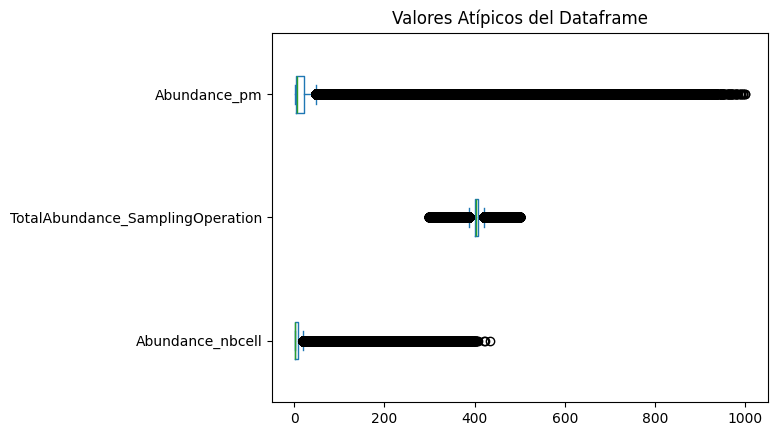

In [3]:
fig = plt.figure(figsize =(15, 8))
cuantitativas.plot(kind='box', vert=False)
plt.title("Valores Atípicos del Dataframe")
plt.show()

In [4]:
y=cuantitativas
Limite_Superior= y.mean() + 3*y.std()
Limite_Inferior= y.mean() - 3*y.std()
print("Limite superior permitido", Limite_Superior)
print("Limite inferior permitido", Limite_Inferior)

Limite superior permitido Abundance_nbcell                     94.948382
TotalAbundance_SamplingOperation    437.096025
Abundance_pm                        233.878730
dtype: float64
Limite inferior permitido Abundance_nbcell                    -71.124054
TotalAbundance_SamplingOperation    374.808697
Abundance_pm                       -175.176372
dtype: float64


In [5]:
data3= cuantitativas[(y<=Limite_Superior)&(y>=Limite_Inferior)]
data3

,Abundance_nbcell,TotalAbundance_SamplingOperation,Abundance_pm
0,8.0,420.0,19.047619
1,1.0,404.0,2.475248
2,1.0,400.0,2.500000
3,2.0,400.0,5.000000
4,1.0,400.0,2.500000
...,...,...,...
1643867,1.0,412.0,2.427184
1643868,1.0,400.0,2.500000
1643869,1.0,403.0,2.481390
1643870,7.0,400.0,17.500000


In [6]:
valores_nulos=data3.isnull().sum()
valores_nulos

Abundance_nbcell                    37619
TotalAbundance_SamplingOperation    34628
Abundance_pm                        37352
dtype: int64

In [7]:
data_clean=data3.copy()
data_clean=data_clean.fillna(round(data3.median(),1))
data_clean

,Abundance_nbcell,TotalAbundance_SamplingOperation,Abundance_pm
0,8.0,420.0,19.047619
1,1.0,404.0,2.475248
2,1.0,400.0,2.500000
3,2.0,400.0,5.000000
4,1.0,400.0,2.500000
...,...,...,...
1643867,1.0,412.0,2.427184
1643868,1.0,400.0,2.500000
1643869,1.0,403.0,2.481390
1643870,7.0,400.0,17.500000


In [8]:
valores_nulos=data_clean.isnull().sum()
valores_nulos

Abundance_nbcell                    0
TotalAbundance_SamplingOperation    0
Abundance_pm                        0
dtype: int64

In [9]:
Datos_limpios = pd.concat([cualitativas, data_clean], axis=1)
Datos_limpios

,TaxonName,TaxonCode,SamplingOperations_code,CodeSite_SamplingOperations,Date_SamplingOperation,Abundance_nbcell,TotalAbundance_SamplingOperation,Abundance_pm
0,Achnanthes aapajaervensis,Achaa01,S04094200_20120910,S04094200,2012-09-10,8.0,420.0,19.047619
1,Achnanthes aapajaervensis,Achaa01,S05155300_20100728,S05155300,2010-07-28,1.0,404.0,2.475248
2,Achnanthes affinis,Achaf01,S02018780_20070808,S02018780,2007-08-08,1.0,400.0,2.500000
3,Achnanthes affinis,Achaf01,S02022675_20090803,S02022675,2009-08-03,2.0,400.0,5.000000
4,Achnanthes affinis,Achaf01,S02094920_20120726,S02094920,2012-07-26,1.0,400.0,2.500000
...,...,...,...,...,...,...,...,...
1643867,Zygoceros surirella,Zygsu01,S03231260_20130806,S03231260,2013-08-06,1.0,412.0,2.427184
1643868,Zygoceros surirella,Zygsu01,S03269295_20110804,S03269295,2011-08-04,1.0,400.0,2.500000
1643869,Zygoceros surirella,Zygsu01,S05076010_20120606,S05076010,2012-06-06,1.0,403.0,2.481390
1643870,Zygoceros surirella,Zygsu01,S05076010_20220831,S05076010,2022-08-31,7.0,400.0,17.500000


Se realiza jerarquía en frecuencias (dataframe obtenido contenga únicamente columnas numéricas).

In [10]:
datos_numericos = Datos_limpios.copy()

In [11]:
taxon_name_mapping = {name: i+1 for i, name in enumerate(Datos_limpios['TaxonName'].unique())}
datos_numericos['TaxonName_num'] = datos_numericos['TaxonName'].map(taxon_name_mapping)

In [12]:
taxon_code_mapping = {code: i+1 for i, code in enumerate(Datos_limpios['TaxonCode'].unique())}
datos_numericos['TaxonCode_num'] = datos_numericos['TaxonCode'].map(taxon_code_mapping)

In [13]:
sampling_ops_mapping = {code: i+1 for i, code in enumerate(Datos_limpios['SamplingOperations_code'].unique())}
datos_numericos['SamplingOperations_code_num'] = datos_numericos['SamplingOperations_code'].map(sampling_ops_mapping)

In [14]:
codesite_mapping = {code: i+1 for i, code in enumerate(Datos_limpios['CodeSite_SamplingOperations'].unique())}
datos_numericos['CodeSite_SamplingOperations_num'] = datos_numericos['CodeSite_SamplingOperations'].map(codesite_mapping)

In [15]:
date_mapping = {date: i+1 for i, date in enumerate(Datos_limpios['Date_SamplingOperation'].unique())}
datos_numericos['Date_SamplingOperation_num'] = datos_numericos['Date_SamplingOperation'].map(date_mapping)

In [16]:
columnas_numericas = ['Abundance_nbcell', 'TotalAbundance_SamplingOperation', 'Abundance_pm',
                     'TaxonName_num', 'TaxonCode_num', 'SamplingOperations_code_num', 
                     'CodeSite_SamplingOperations_num', 'Date_SamplingOperation_num']

Tabla_final_num = datos_numericos[columnas_numericas]

Tabla_final_num.head()

,Abundance_nbcell,TotalAbundance_SamplingOperation,Abundance_pm,TaxonName_num,TaxonCode_num,SamplingOperations_code_num,CodeSite_SamplingOperations_num,Date_SamplingOperation_num
0,8.0,420.0,19.047619,1,1,1,1,1
1,1.0,404.0,2.475248,1,1,2,2,2
2,1.0,400.0,2.500000,2,2,3,3,3
3,2.0,400.0,5.000000,2,2,4,4,4
4,1.0,400.0,2.500000,2,2,5,5,5


Generar correlación

In [17]:
# Calcular la matriz de correlación
corr = Tabla_final_num.corr()
# Mostrar la matriz
print(corr)

                                  Abundance_nbcell  \
Abundance_nbcell                          1.000000   
TotalAbundance_SamplingOperation          0.000679   
Abundance_pm                              0.989024   
TaxonName_num                            -0.100268   
TaxonCode_num                            -0.100268   
SamplingOperations_code_num               0.039539   
CodeSite_SamplingOperations_num           0.031225   
Date_SamplingOperation_num                0.006539   

                                  TotalAbundance_SamplingOperation  \
Abundance_nbcell                                          0.000679   
TotalAbundance_SamplingOperation                          1.000000   
Abundance_pm                                             -0.004918   
TaxonName_num                                             0.002009   
TaxonCode_num                                             0.002009   
SamplingOperations_code_num                              -0.018160   
CodeSite_SamplingOperat

In [18]:
corr_pairs = corr.unstack()

# Eliminar autocorrelaciones (correlación de una variable consigo misma = 1)
corr_pairs = corr_pairs.drop(labels=[(c,c) for c in corr.columns])

# Ordenar por valor absoluto de correlación
top_5 = corr_pairs.abs().sort_values(ascending=False).head(5)

print(top_5)

TaxonCode_num                TaxonName_num                      1.000000
TaxonName_num                TaxonCode_num                      1.000000
Abundance_nbcell             Abundance_pm                       0.989024
Abundance_pm                 Abundance_nbcell                   0.989024
SamplingOperations_code_num  CodeSite_SamplingOperations_num    0.383587
dtype: float64


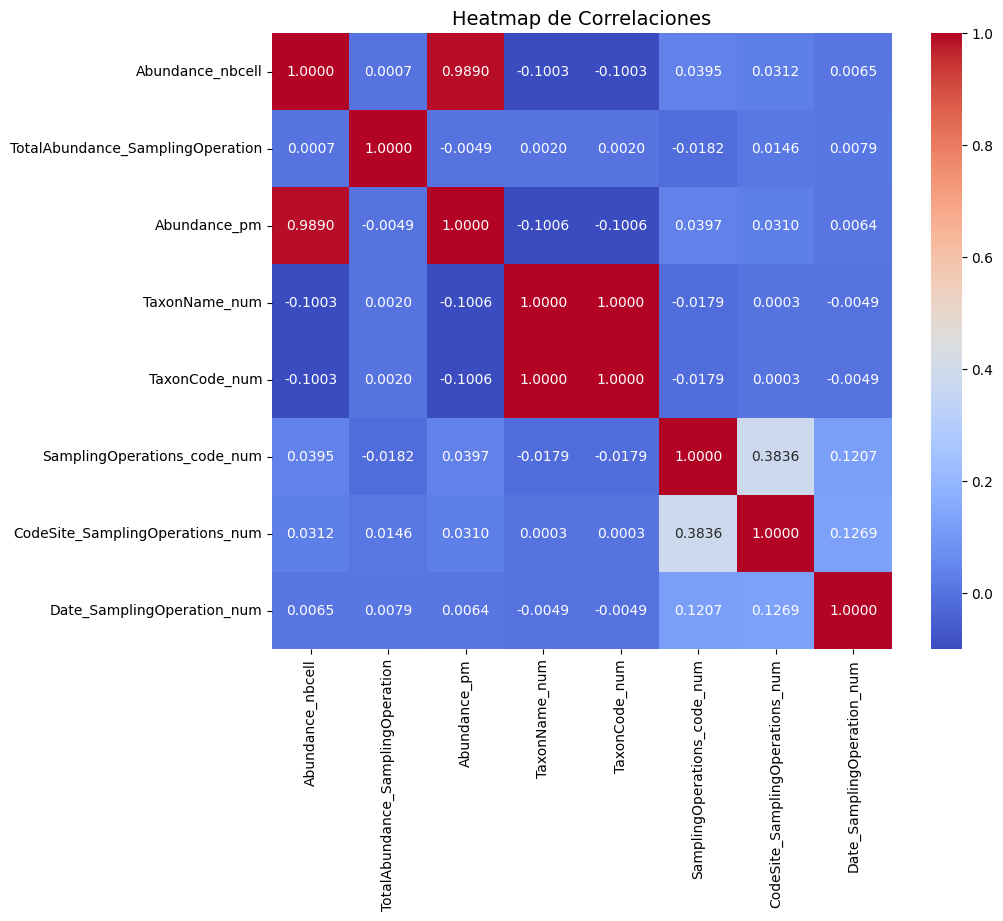

In [19]:
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".4f")
plt.title("Heatmap de Correlaciones", fontsize=14)
plt.show()

In [20]:
corr = Tabla_final_num.corr()

# Convertimos la matriz a formato "long" (pares de variables)
pairs_df = corr.unstack().reset_index()
pairs_df.columns = ["Variable_1", "Variable_2", "Correlación"]

# Quitamos los pares repetidos y la diagonal (una variable consigo misma)
pairs_df = pairs_df[pairs_df["Variable_1"] < pairs_df["Variable_2"]]

# Agregamos columna con valor absoluto
pairs_df["Correlación_abs"] = pairs_df["Correlación"].abs()

# Ordenamos por correlación absoluta y tomamos los 5 más altos
top5 = pairs_df.sort_values("Correlación_abs", ascending=False).head(5)

top5

,Variable_1,Variable_2,Correlación,Correlación_abs
35,TaxonCode_num,TaxonName_num,1.000000,1.000000
2,Abundance_nbcell,Abundance_pm,0.989024,0.989024
53,CodeSite_SamplingOperations_num,SamplingOperations_code_num,0.383587,0.383587
55,CodeSite_SamplingOperations_num,Date_SamplingOperation_num,0.126912,0.126912
61,Date_SamplingOperation_num,SamplingOperations_code_num,0.120650,0.120650


Generar modelos de regression lineal multiple

In [21]:
Vars_Indep= Tabla_final_num[['Abundance_pm', 'Abundance_nbcell','SamplingOperations_code_num']]
Var_Dep= Tabla_final_num['TaxonName_num']

In [22]:
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [23]:
model.fit(X=Vars_Indep, y=Var_Dep)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [24]:
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'tol': 1e-06,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['Abundance_pm', 'Abundance_nbcell', 'SamplingOperations_code_num'],
       dtype=object),
 'n_features_in_': 3,
 'coef_': array([-1.33613958e+00, -1.74742901e+00, -7.05436347e-04]),
 'rank_': 3,
 'singular_': array([1.76072619e+07, 4.73304634e+04, 2.43964556e+03]),
 'intercept_': np.float64(1155.449782699155)}

In [25]:
model.score(Vars_Indep,Var_Dep)

0.010341433088135621

In [26]:
y_pred= model.predict(X=Tabla_final_num[['Abundance_pm', 'Abundance_nbcell','SamplingOperations_code_num']])
y_pred

array([1116.01936753, 1150.39366664, 1150.35988844, ..., 1145.34864448,
       1091.20167571, 1148.03053762], shape=(1643872,))

In [27]:
Tabla_final_num.insert(0, 'Predicciones1', y_pred)

<Axes: xlabel='Abundance_pm', ylabel='TaxonName_num'>

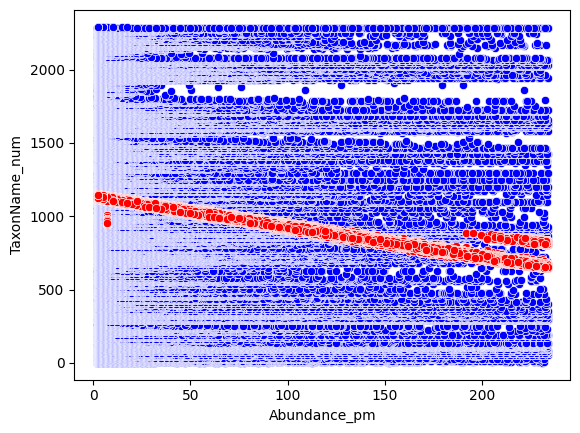

In [28]:
sns.scatterplot(x='Abundance_pm', y='TaxonName_num', color="blue", data=Tabla_final_num)
sns.scatterplot(x='Abundance_pm', y='Predicciones1', color="red", data=Tabla_final_num)

In [29]:
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter

0.010341433088135621

In [ ]:
coef_Correl=np.sqrt(coef_Deter)
coef_Correl #Se compuebe que sea mayor (entodas las demas igual)

np.float64(0.1016928369558821)

In [31]:
Vars_Indep= Tabla_final_num[['Abundance_pm', 'Abundance_nbcell','SamplingOperations_code_num']]
Var_Dep= Tabla_final_num['TaxonCode_num']

In [32]:
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [33]:
model.fit(X=Vars_Indep, y=Var_Dep)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [34]:
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'tol': 1e-06,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['Abundance_pm', 'Abundance_nbcell', 'SamplingOperations_code_num'],
       dtype=object),
 'n_features_in_': 3,
 'coef_': array([-1.33613958e+00, -1.74742901e+00, -7.05436347e-04]),
 'rank_': 3,
 'singular_': array([1.76072619e+07, 4.73304634e+04, 2.43964556e+03]),
 'intercept_': np.float64(1155.449782699155)}

In [35]:
model.score(Vars_Indep,Var_Dep)

0.010341433088135621

In [36]:
y_pred= model.predict(X=Tabla_final_num[['Abundance_pm', 'Abundance_nbcell','SamplingOperations_code_num']])
y_pred

array([1116.01936753, 1150.39366664, 1150.35988844, ..., 1145.34864448,
       1091.20167571, 1148.03053762], shape=(1643872,))

In [37]:
Tabla_final_num.insert(0, 'Predicciones', y_pred)

<Axes: xlabel='Abundance_pm', ylabel='TaxonCode_num'>

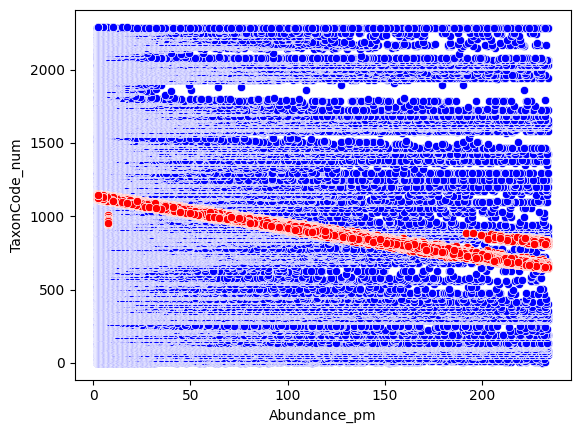

In [38]:
sns.scatterplot(x='Abundance_pm', y='TaxonCode_num', color="blue", data=Tabla_final_num)
sns.scatterplot(x='Abundance_pm', y='Predicciones', color="red", data=Tabla_final_num)

In [39]:
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter

0.010341433088135621

In [40]:
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

np.float64(0.1016928369558821)

In [41]:
Vars_Indep= Tabla_final_num[['Abundance_pm', 'Date_SamplingOperation_num','CodeSite_SamplingOperations_num']]
Var_Dep= Tabla_final_num['SamplingOperations_code_num']

In [42]:
model= LinearRegression()
model.fit(X=Vars_Indep, y=Var_Dep)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [43]:
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'tol': 1e-06,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['Abundance_pm', 'Date_SamplingOperation_num',
        'CodeSite_SamplingOperations_num'], dtype=object),
 'n_features_in_': 3,
 'coef_': array([11.06247255,  2.26396373,  2.42836472]),
 'rank_': 3,
 'singular_': array([2708806.47765167,  563534.18645298,   43947.64523517]),
 'intercept_': np.float64(13158.92068540796)}

In [44]:
model.score(Vars_Indep,Var_Dep)

0.15316573522299237

In [45]:
y_pred= model.predict(X=Tabla_final_num[['Abundance_pm', 'Date_SamplingOperation_num','CodeSite_SamplingOperations_num']])
y_pred

array([13374.32677668, 13195.68770009, 13200.65385212, ...,
       21459.00138591, 23175.95950354, 18020.78337063], shape=(1643872,))

In [46]:
Tabla_final_num.insert(0, 'Predicciones2', y_pred)

<Axes: xlabel='CodeSite_SamplingOperations_num', ylabel='SamplingOperations_code_num'>

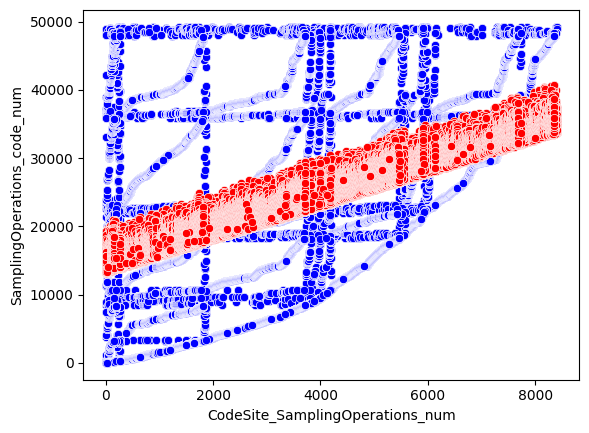

In [47]:
sns.scatterplot(x='CodeSite_SamplingOperations_num', y='SamplingOperations_code_num', color="blue", data=Tabla_final_num)
sns.scatterplot(x='CodeSite_SamplingOperations_num', y='Predicciones2', color="red", data=Tabla_final_num)

In [48]:
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter

0.15316573522299237

In [49]:
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

np.float64(0.39136394215997006)

In [50]:
Vars_Indep= Tabla_final_num[['SamplingOperations_code_num', 'Date_SamplingOperation_num','Abundance_nbcell']]
Var_Dep= Tabla_final_num['CodeSite_SamplingOperations_num']

In [51]:
model= LinearRegression()
model.fit(X=Vars_Indep, y=Var_Dep)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [52]:
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'tol': 1e-06,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['SamplingOperations_code_num', 'Date_SamplingOperation_num',
        'Abundance_nbcell'], dtype=object),
 'n_features_in_': 3,
 'coef_': array([0.05737686, 0.38970418, 2.42636398]),
 'rank_': 3,
 'singular_': array([17607395.50389839,   564182.77433481,    17773.54077437]),
 'intercept_': np.float64(1553.6383560698828)}

In [53]:
model.score(Vars_Indep,Var_Dep)

0.15399031920521422

In [54]:
y_pred= model.predict(X=Tabla_final_num[['SamplingOperations_code_num', 'Date_SamplingOperation_num','Abundance_nbcell']])
y_pred

array([1573.49634897, 1556.95888214, 1557.40596318, ..., 1990.79134149,
       4191.43819503, 1799.08472427], shape=(1643872,))

In [55]:
Tabla_final_num.insert(0, 'Predicciones3', y_pred)

<Axes: xlabel='SamplingOperations_code_num', ylabel='CodeSite_SamplingOperations_num'>

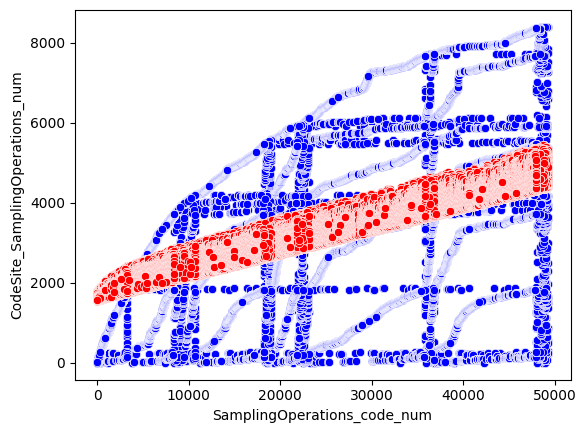

In [56]:
sns.scatterplot(x='SamplingOperations_code_num', y='CodeSite_SamplingOperations_num', color="blue", data=Tabla_final_num)
sns.scatterplot(x='SamplingOperations_code_num', y='Predicciones3', color="red", data=Tabla_final_num)

In [57]:
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter

0.15399031920521422

In [58]:
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

np.float64(0.3924160027384386)

In [59]:
Vars_Indep= Tabla_final_num[['CodeSite_SamplingOperations_num', 'SamplingOperations_code_num','TotalAbundance_SamplingOperation']]
Var_Dep= Tabla_final_num['Date_SamplingOperation_num']

In [60]:
model= LinearRegression()
model.fit(X=Vars_Indep, y=Var_Dep)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [61]:
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'tol': 1e-06,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['CodeSite_SamplingOperations_num', 'SamplingOperations_code_num',
        'TotalAbundance_SamplingOperation'], dtype=object),
 'n_features_in_': 3,
 'coef_': array([0.01980102, 0.00273104, 0.52538354]),
 'rank_': 3,
 'singular_': array([1.76384991e+07, 2.49623941e+06, 8.67084310e+03]),
 'intercept_': np.float64(334.63756879826667)}

In [62]:
model.score(Vars_Indep,Var_Dep)

0.022243995291431173

In [63]:
y_pred= model.predict(X=Tabla_final_num[['CodeSite_SamplingOperations_num', 'SamplingOperations_code_num','TotalAbundance_SamplingOperation']])
y_pred

array([555.32118729, 546.93758272, 544.85858063, ..., 632.1462456 ,
       721.9179251 , 590.70637678], shape=(1643872,))

In [64]:
Tabla_final_num.insert(0, 'Predicciones4', y_pred)

<Axes: xlabel='CodeSite_SamplingOperations_num', ylabel='Date_SamplingOperation_num'>

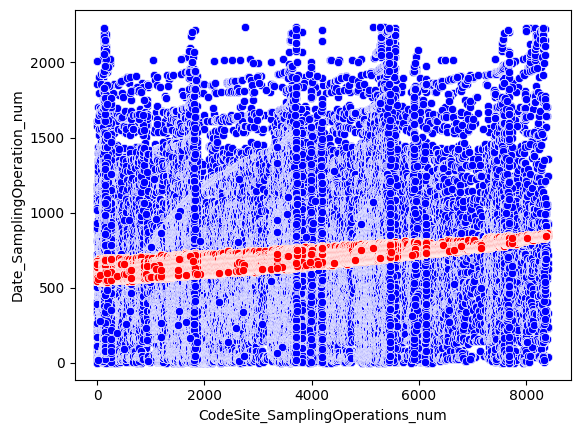

In [65]:
sns.scatterplot(x='CodeSite_SamplingOperations_num', y='Date_SamplingOperation_num', color="blue", data=Tabla_final_num)
sns.scatterplot(x='CodeSite_SamplingOperations_num', y='Predicciones4', color="red", data=Tabla_final_num)

In [66]:
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter

0.022243995291431173

In [67]:
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

np.float64(0.14914420971472936)

In [68]:
Vars_Indep= Tabla_final_num[['TaxonName_num', 'TaxonCode_num','SamplingOperations_code_num']]
Var_Dep= Tabla_final_num['Abundance_nbcell']

In [69]:
model= LinearRegression()
model.fit(X=Vars_Indep, y=Var_Dep)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [70]:
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'tol': 1e-06,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['TaxonName_num', 'TaxonCode_num', 'SamplingOperations_code_num'],
       dtype=object),
 'n_features_in_': 3,
 'coef_': array([-9.90358453e-04, -9.90358453e-04,  3.81454851e-05]),
 'rank_': 2,
 'singular_': array([1.76072764e+07, 1.26463843e+06, 4.42731279e-07]),
 'intercept_': np.float64(9.692695689942834)}

In [71]:
model.score(Vars_Indep,Var_Dep)

0.01147890860949119

In [72]:
y_pred= model.predict(X=Tabla_final_num[['TaxonName_num', 'TaxonCode_num','SamplingOperations_code_num']])
y_pred

array([9.69075312, 9.69079126, 9.68884869, ..., 5.4253276 , 6.70121778,
       5.27896337], shape=(1643872,))

In [73]:
Tabla_final_num.insert(0, 'Predicciones5', y_pred)

<Axes: xlabel='TaxonName_num', ylabel='Abundance_nbcell'>

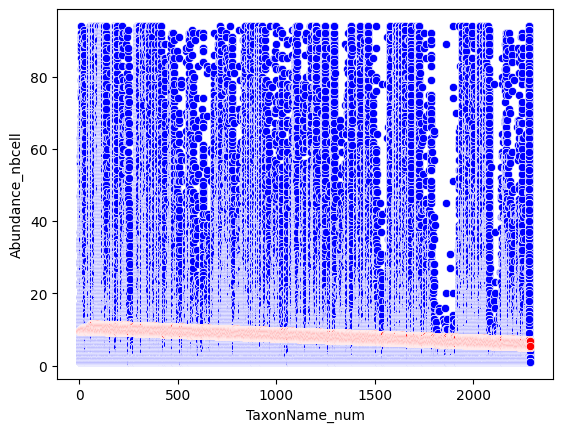

In [74]:
sns.scatterplot(x='TaxonName_num', y='Abundance_nbcell', color="blue", data=Tabla_final_num)
sns.scatterplot(x='TaxonName_num', y='Predicciones5', color="red", data=Tabla_final_num)

In [75]:
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter

0.01147890860949119

In [76]:
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

np.float64(0.10713966870161205)

In [77]:
Vars_Indep= Tabla_final_num[['SamplingOperations_code_num', 'CodeSite_SamplingOperations_num','Date_SamplingOperation_num']]
Var_Dep= Tabla_final_num['TotalAbundance_SamplingOperation']

In [78]:
model= LinearRegression()
model.fit(X=Vars_Indep, y=Var_Dep)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [79]:
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'tol': 1e-06,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['SamplingOperations_code_num', 'CodeSite_SamplingOperations_num',
        'Date_SamplingOperation_num'], dtype=object),
 'n_features_in_': 3,
 'coef_': array([-1.40713907e-05,  7.86129747e-05,  1.25062061e-04]),
 'rank_': 3,
 'singular_': array([17638634.16316076,  2496746.68888054,   561882.09812186]),
 'intercept_': np.float64(405.17068600530183)}

In [80]:
model.score(Vars_Indep,Var_Dep)

0.0009419290521628376

In [81]:
y_pred= model.predict(X=Tabla_final_num[['SamplingOperations_code_num', 'CodeSite_SamplingOperations_num','Date_SamplingOperation_num']])
y_pred

array([405.17087561, 405.17106521, 405.17125482, ..., 405.34130973,
       404.95631737, 405.28776953], shape=(1643872,))

In [82]:
Tabla_final_num.insert(0, 'Predicciones6', y_pred)

<Axes: xlabel='SamplingOperations_code_num', ylabel='TotalAbundance_SamplingOperation'>

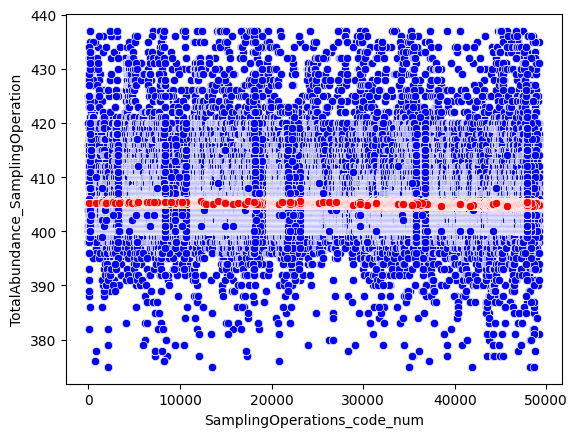

In [83]:
sns.scatterplot(x='SamplingOperations_code_num', y='TotalAbundance_SamplingOperation', color="blue", data=Tabla_final_num)
sns.scatterplot(x='SamplingOperations_code_num', y='Predicciones6', color="red", data=Tabla_final_num)

In [84]:
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter

0.0009419290521628376

In [85]:
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

np.float64(0.030690862681958576)

In [86]:
Vars_Indep= Tabla_final_num[['TaxonName_num', 'TaxonCode_num','SamplingOperations_code_num']]
Var_Dep= Tabla_final_num['Abundance_pm']

In [87]:
model= LinearRegression()
model.fit(X=Vars_Indep, y=Var_Dep)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [88]:
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'tol': 1e-06,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['TaxonName_num', 'TaxonCode_num', 'SamplingOperations_code_num'],
       dtype=object),
 'n_features_in_': 3,
 'coef_': array([-2.45640680e-03, -2.45640680e-03,  9.46251827e-05]),
 'rank_': 2,
 'singular_': array([1.76072764e+07, 1.26463843e+06, 4.42731279e-07]),
 'intercept_': np.float64(23.943561293499574)}

In [89]:
model.score(Vars_Indep,Var_Dep)

0.011557593659038079

In [90]:
y_pred= model.predict(X=Tabla_final_num[['TaxonName_num', 'TaxonCode_num','SamplingOperations_code_num']])
y_pred

array([23.93874311, 23.93883773, 23.93401954, ..., 13.35920556,
       16.52422867, 12.99612873], shape=(1643872,))

In [91]:
Tabla_final_num.insert(0, 'Predicciones7', y_pred)

<Axes: xlabel='TaxonName_num', ylabel='Abundance_pm'>

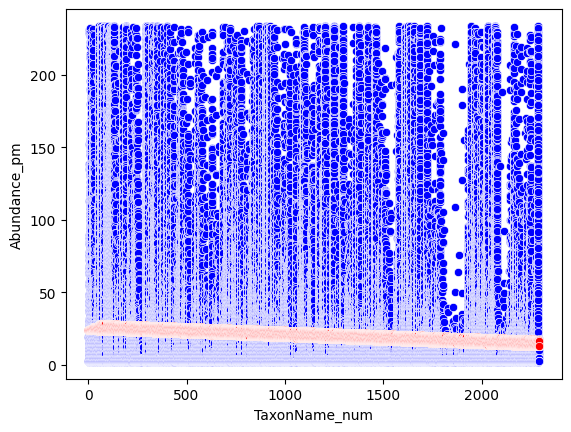

In [92]:
sns.scatterplot(x='TaxonName_num', y='Abundance_pm', color="blue", data=Tabla_final_num)
sns.scatterplot(x='TaxonName_num', y='Predicciones7', color="red", data=Tabla_final_num)

In [93]:
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter

0.011557593659038079

In [94]:
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

np.float64(0.10750624939527041)